
## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations



## <span style="color:blue">Problem statment

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to answer the questions provided below


## <span style="color:blue">Data Description

The job bulletins will be provided as a folder of plain-text files, one for each job classification.

Job Bulletins: 683 plain-text job postings

Instructions and Additional Documents:

- Job Bulletins with Annotations

- Annotation Descriptions.docx

- City Job Paths

- PDFs

- Description of promotions in job bulletins.docx

- Job_titles.csv

- Kaggle_data_dictionary.csv


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- FILE_NAME: The bulletins file name.
- JOB_CLASS_TITLE: Job title.
- JOB_CLASS_NO: Job number.
- JOB_DUTIES: The duties of this job.
- EDUCATION_YEARS: Number of education yeras needed to apply for this job.
- SCHOOL_TYPE: The type of school you need to study in.
- EDUCATION_MAJOR: The eductaion major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job .
- FULL_TIME_PART_TIME: If the job is full time or part time or both.
- EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
- COURSE_COUNT: Number of courses neede to apply for this job.
- COURSE_LENGTH: The course length in years or months.
- COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
- DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
- EXAM_TYPE: Type of exams neededin the hiring process.
- ENTRY_SALARY: Salary range in this job.
- OPEN_DATE: Date at it the job bulliten got open.
- REQUIREMENT_SET_TEXT: The requirments set need for this job in points.

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
import re
from itertools import islice
import locale
from locale import atof
from sklearn import preprocessing

In [ ]:
# link colab with google drive
drive.mount("/content/drive")
paths = os.listdir("/content/drive/MyDrive/Job Bulletins")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#creat data frame with one column that each element of it represent one file
li_co = []
df = pd.DataFrame(index=range(len(paths)) , columns=["Content"])
for x,n in zip(paths, range(len(paths))) :
  f =open(f"/content/drive/MyDrive/Job Bulletins/{x}" , encoding = "ISO-8859-1" )
  z= f.read()
  li_co.append(z)
  df.iloc[n] = li_co[n]

In [ ]:
df[["FILE_NAME" , "JOB_CLASS_TITLE" , "JOB_CLASS_NO" , "JOB_DUTIES" , "EXAM_TYPE" , "OPEN_DATE" , "FULL_TIME_PART_TIME","DRIVERS_LICENSE_REQ","COURSE_LENGTH",
    "COURSE_SUBJECT","COURSE_COUNT","Exp_Condition","Min Salary","Max Salary" , "EXPERIENCE_LENGTH","EXP_JOB_CLASS_TITLE" ,"REQUIREMENT_SET_TEXT" ,
    "SCHOOL_TYPE", "EDUCATION_YEARS" , "EDUCATION_MAJOR" ]] = 0
h_num = {"one year":1, "two year":2,"two and one-half":2.5, "three year":3, "four year":4, "five year":5, "six year":6, "seven year":7, "eight year":8, "nine year":9, "ten year":10,
         "one month":0.1, "two month":0.2, "three month":0.3, "four month":0.4, "five month":0.5, "six month":0.6, "seven month":0.7, "eight month":0.8, "nine month":0.9,"eighteen months":1.8 ,         "eleven":11,"twelve":12,"thirteen":13, "fourteen":14,"fifteen":15, 'sixteen':16,"seventeen":17,"eighteen":18,"nineteen":19, "twenty":20,"thirty-two" : 32,
         "twenty-three":23,"twenty-four":24,"twenty-seven":27,"thirty":30, "thirty-six":36, "fourty-five":45, "sixty":60, "ninety":90}
numbers = dict(list(h_num.items())[:22])
numberz = {"one":1, "two":2, "three":3, "four":4, "five":5, "six":6, "seven":7, "eight":8, "nine":9 }
total_lists = []
exp_title = []
course_list=[]
# pass all files through for_loop.
for n in range(len(paths)):

  # (FILE_NAME) feature code.
  df["FILE_NAME"].iloc[n] = paths[n][:-4].strip()

  # (JOB_CLASS_TITLE) feature code.
  df["JOB_CLASS_TITLE"].iloc[n] = df["Content"].iloc[n][:df["Content"].iloc[n].index("\n")].strip()

  # (JOB_CLASS_NO) feature code.
  summ = sum(c.isdigit() for c in df["FILE_NAME"].iloc[n]) # variable represent the counting of sequential numbers
  if summ >6 :
      df["JOB_CLASS_NO"].iloc[n] = df["FILE_NAME"].iloc[n][[x.isdigit() for x in df["FILE_NAME"].iloc[n]].index(True) : [x.isdigit() for x in df["FILE_NAME"].iloc[n]].index(True)+4]
  else :
      df["JOB_CLASS_NO"].iloc[n] = np.NAN

  # (JOB_DUTIES) feature code.
  try:
    df["JOB_DUTIES"].iloc[n] = df["Content"].iloc[n][ df["Content"].iloc[n].index("DUTIES")+8 : df["Content"].iloc[n].index("REQUIREMENT")].strip("\n")
  except:
    df["JOB_DUTIES"].iloc[n] = np.NAN

  # (EXAM_TYPE) feature code.
  try:
    df["EXAM_TYPE"].iloc[n] = df["Content"].iloc[n][df["Content"].iloc[n].index("Examination Weight")+18 : df["Content"].iloc[n].index("Examination Weight")+60].strip(".: \t s")
  except:
    df["EXAM_TYPE"].iloc[n] = "OPEN COMPETITIVE BASIS"
    df["EXAM_TYPE"][df["JOB_CLASS_TITLE"]=="DEPARTMENT OF PUBLIC WORKS"] = np.NAN

  # (OPEN_DATE) feature code.
  try:
    f_index = re.search("ate:", df["Content"].iloc[n]).end()
    l_index = re.search("\\n|\(", df["Content"].iloc[n][f_index:]).start()
    df["OPEN_DATE"].iloc[n] = df["Content"].iloc[n][f_index : f_index+l_index].strip("\n ")
  except:
    df["OPEN_DATE"].iloc[n]=np.NAN

  # (FULL_TIME_PART_TIME) feature code.
  if (("full-time" or "full time" ) and ("part-time" or "part time")) in  df["Content"].iloc[n]:
    df["FULL_TIME_PART_TIME"].iloc[n] = "FULL_TIME_PART_TIME"
  elif ("full-time" or "full time" )  in  df["Content"].iloc[n]:
    df["FULL_TIME_PART_TIME"].iloc[n] = "FULL_TIME"
  elif ("part-time" or "part time")  in  df["Content"].iloc[n]:
    df["FULL_TIME_PART_TIME"].iloc[n] = "PART_TIME"
  else:
    df["FULL_TIME_PART_TIME"].iloc[n] = np.NAN

  # (Max & Min Salary) features code.
  def get_all_indices(stringg, item): # function return the indixes of item in all its repetitions
    return [i for i in range(len(stringg)) if stringg[i] == item]
  indexx = get_all_indices(df["Content"].iloc[n], "$")
  indexes =[i for i in indexx if df["Content"].iloc[n][i+1 : i+8].lower().islower() == False]
  if len(indexes) > 0 :
    df["Max Salary"].iloc[n] = df["Content"].iloc[n][indexes[-1]+1 : indexes[-1]+8].strip("*.;\n[a-zA-Z]\t(). ")
    df["Min Salary"].iloc[n] = df["Content"].iloc[n][indexes[0]+1 : indexes[0]+8].strip("*.;\n[a-zA-Z]\t(). ")
  else:
    df["Max Salary"].iloc[n] = np.NAN
    df["Min Salary"].iloc[n] = np.NAN


  # (DRIVERS_LICENSE_REQ) feature code.
  if ("driver's licence" and "may require") in  df["Content"].iloc[n].lower():
    df["DRIVERS_LICENSE_REQ"].iloc[n] = " possibly required"
  elif "driver's license"   in  df["Content"].iloc[n].lower():
    df["DRIVERS_LICENSE_REQ"].iloc[n] = "required"
  else:
    df["DRIVERS_LICENSE_REQ"].iloc[n] = "not required"

  # (REQUIREMENT_SET_TEXT & EXPERIENCE_LENGTH) features code.
  exp_len = [] # it will contain the experience length for each job required
  try:
    f_index = re.search("REQUIREMENT", df["Content"].iloc[n]).end()
    l_index = re.search("PROCESS NOTE|NOTE|WHERE TO APPLY", df["Content"].iloc[n][f_index:]).start()
    df["REQUIREMENT_SET_TEXT"].iloc[n] = df["Content"].iloc[n][f_index: f_index+l_index]

    strip_index = re.search("\n\n|\n\t\n|\n \n|\n  \n",df["REQUIREMENT_SET_TEXT"].iloc[n]).end()
    df["REQUIREMENT_SET_TEXT"].iloc[n] = df["REQUIREMENT_SET_TEXT"].iloc[n][strip_index:-2]
    num_ind = {}
    for num in numbers.keys():
      sub_str = df["REQUIREMENT_SET_TEXT"].iloc[n].lower()
      if  f"[^n] the last {num}" in sub_str:
        continue
      elif f"{num} college" in sub_str:
        continue
      elif(num in  sub_str ) and (f"a maximum of {num}" or f"a minimum of {num}") not in sub_str :
        exp_len.append(numbers[num])
        num_ind.update( {numbers[num]: sub_str.index(num)})
    exp_len = sorted(exp_len, key = lambda v: num_ind[v]) # the sorting prosses to make sure that index in experience length list meet the index of jop title list
    total_lists.append(exp_len) # save all column values in list

  except:
    total_lists.append([])
    df["REQUIREMENT_SET_TEXT"].iloc[n] = np.NAN

  # (SCHOOL_TYPE) feature code.
  if "school" in str(df["REQUIREMENT_SET_TEXT"].iloc[n]).lower():
    df["SCHOOL_TYPE"].iloc[n] = "HIGH SCHOOL"
  elif ("college or university" or "university or college" or "college" or "bachelor's degree") in str(df["REQUIREMENT_SET_TEXT"].iloc[n]).lower():
    df["SCHOOL_TYPE"].iloc[n] = "COLLEGE OR UNIVERSITY"
  elif "apprenticeship" in str(df["REQUIREMENT_SET_TEXT"].iloc[n]).lower():
    df["SCHOOL_TYPE"].iloc[n] = "APPRENTICESHIP"
  else :
    df["SCHOOL_TYPE"].iloc[n] = "None"


  # (EDUCATION_YEARS) feature code.
  keys = list(numberz.keys())
  values = list(numberz.values())
  try:
    ind = re.search("college|apprenticeship ",str(df["REQUIREMENT_SET_TEXT"].iloc[n])).start()
    for k,v in zip(keys,values):
      if k in str(df["REQUIREMENT_SET_TEXT"].iloc[n])[ind-30:ind]:
        df["EDUCATION_YEARS"].iloc[n] = v
  except:
    df["EDUCATION_YEARS"].iloc[n] = 0

  # (EXP_JOB_CLASS_TITLE) feature code.
  if len(total_lists[n]) >0 :
    exp_title_list = [] # list will contain experience jop title for all jop required
    fs_index = 0
    try :
      for T in range(len(total_lists[n])):
          data= df["REQUIREMENT_SET_TEXT"].iloc[n][fs_index:].lower()
          try:
             f_index = re.search(" as a | at the level of | as an | in [c-eg-z]| at the | experience of the | experience driving a | experience in the [^Cc]| instructing in the | performing duties involving | in a ", data).end()-1
          except:
            f_index = re.search(" paid [a-z][a-ln-wy-z]", data).end()-2
          l_index = re.search("with |\,|\.|\;| or | engaged in | in the City | or in a ", data[f_index:]).start()
          exp_t = data[f_index: f_index+l_index].strip()
          if exp_t == "class at that level":
            exp_t="not"
          exp_title_list.append(exp_t)
          fs_index = l_index + f_index
      exp_title.append(exp_title_list)
    except:
      exp_title.append(["not"])
  else:
    exp_title.append([])


  # (EDUCATION_MAJOR) feature code.
  try :
    f_index = re.search(" major in | degree in | majoring ", df["REQUIREMENT_SET_TEXT"].iloc[n]).end()
    l_index = re.search("\;| from a| which include| with at least|, or a Bachelor", df["REQUIREMENT_SET_TEXT"].iloc[n][f_index:]).start()
    df["EDUCATION_MAJOR"].iloc[n] = df["REQUIREMENT_SET_TEXT"].iloc[n][f_index : f_index+l_index].strip()
  except:
    df["EDUCATION_MAJOR"].iloc[n] = np.NAN

  # (COURSE_SUBJECT) feature code.
  try :
    f_index = re.search(" courses in | course in |Hayden ", df["REQUIREMENT_SET_TEXT"].iloc[n]).end()
    l_index = re.search("\; | course |\,| at an |\.| from a|\(| may be | is especially | Course ", df["REQUIREMENT_SET_TEXT"].iloc[n][f_index:]).start()
    df["COURSE_SUBJECT"].iloc[n] = df["REQUIREMENT_SET_TEXT"].iloc[n][f_index : f_index+l_index].strip()
    if "either" in df["COURSE_SUBJECT"].iloc[n][:7]:
      df["COURSE_SUBJECT"].iloc[n] = df["COURSE_SUBJECT"].iloc[n][6:].strip()
  except EnvironmentError:
    f_index = re.search("completion of the | units of | units in |Hayden ", df["REQUIREMENT_SET_TEXT"].iloc[n]).end()
    l_index = re.search("; | course |\,| at an |\.| from a|\(| may be | is especially | Course ", df["REQUIREMENT_SET_TEXT"].iloc[n][f_index:]).start()
    df["COURSE_SUBJECT"].iloc[n] = df["REQUIREMENT_SET_TEXT"].iloc[n][f_index : f_index+l_index].strip()
  except :
    df["COURSE_SUBJECT"].iloc[n] = np.NAN


  # (COURSE_COUNT & COURSE_LENGTH) features code.
  sttr =  str(df['REQUIREMENT_SET_TEXT'].iloc[n]).lower()
  try:
    if ("semester" in  sttr) and ("quarter" in sttr):
      rep = sttr.count("semester")
      len_list = []
      year_list=[]
      for b in range(rep):
        sem_num = sttr[sttr.index("semester")-3: sttr.index("semester")]
        qua_num = sttr[sttr.index("quarter")-3: sttr.index("quarter")]
        sttr= sttr[sttr.index("quarter")+8:]
        len_list.append(f"{sem_num}S , {qua_num}Q")
        year_list.append(qua_num)
      course_list.append(year_list)
      df["COURSE_LENGTH"].iloc[n]= len_list
      df["COURSE_COUNT"].iloc[n]= rep
    else:
      course_list.append(["0"])
  except:
    df["COURSE_LENGTH"].iloc[n]= np.NAN
    df["COURSE_COUNT"].iloc[n]= 0


  # (Exp_Condition) feature code.
  if (";or\n" in sttr) or (";and either\n" in sttr) or ("; and either\n"in sttr)or ("; or\n"in sttr) :
    df["Exp_Condition"].iloc[n] = "or"
  elif (";and\n"in sttr) or( "; and\n"in sttr ):
    df["Exp_Condition"].iloc[n] = "and"
  else:
    df["Exp_Condition"].iloc[n] = "none"


df["EXPERIENCE_LENGTH"] = pd.Series(total_lists)
df["EXP_JOB_CLASS_TITLE"] = pd.Series(exp_title)


#df[["FILE_NAME", "EXPERIENCE_LENGTH" , "EXP_JOB_CLASS_TITLE"]][0:40]
#df[].iloc[n] = df["Content"].iloc[n][]
#df[["FILE_NAME","COURSE_SUBJECT"]][df["COURSE_SUBJECT"].isnull()== False].head(40)
#df[df["JOB_DUTIES"].isnull()== True]
#df[["FILE_NAME","EXPERIENCE_LENGTH","EXP_JOB_CLASS_TITLE"]][df["EXPERIENCE_LENGTH"].isnull()== False][0:80]
#df[["FILE_NAME","COURSE_SUBJECT","COURSE_LENGTH","COURSE_COUNT"]].head(30)
#df["EXPERIENCE_LENGTH"].head()
#df["OPEN_DATE"].head()


In [ ]:
# Convert Min & Max salary to float format
df['Max Salary'].iloc[5]= df['Max Salary'].iloc[5].replace(" ","")
df['Max Salary'] = df['Max Salary'].str.replace(',', '').replace(" ","").astype(float)
df['Min Salary'] = df['Min Salary'].str.replace(',', '').replace(" ","").astype(float)


# Change the Open Date column format from string to datetime format
df['OPEN_DATE'] = pd.to_datetime(df['OPEN_DATE'], infer_datetime_format=True)

# Exam_type values correction from 40 diffrent values to 4 values
df["EXAM_TYPE"]= df["EXAM_TYPE"].fillna("Written Test")
for x in range(683):
  if df["EXAM_TYPE"].iloc[x] in ("Multiple-Choice" ,"Qualifying Multiple-Choice Test", "Multiple-Choice Test" , "Multiple-Choice Written Test" , "Multiple-choice Test" , "Multiple Choice Test"):
    df["EXAM_TYPE"].iloc[x]= "Multiple-Choice"
  elif df["EXAM_TYPE"].iloc[x] in ("Essay","Essay Test" , "Advisory Essay" , "\n\tEssay","Advisory" ,"Written Test","OPEN COMPETITIVE BASIS" ,"Written Test - Multiple-Choice", "Written" , "Written test","Personal Characteristics Written Test","Writing Exercise" , "Technical Exercise"):
    df["EXAM_TYPE"].iloc[x]= "Written Test"
  elif df["EXAM_TYPE"].iloc[x] in ( "Application Review","Demonstration of Job Knowledge and Eval","Demonstration of Job Knowledge and Evalu","Technical Interview"):
    df["EXAM_TYPE"].iloc[x]= "Interview"
  elif df["EXAM_TYPE"].iloc[x] in ("Training and Experience Questionnaire","Record of Personal Accomplishment","Training and Experience Questionnai","Performance Test","Job Simulation Exercise" , "Physical Abilitie " , "Physical Abilities Test" ,"Physical Abilitie" ,"Proofreading Exercise","Training and Experience Questionnaire/I","Training & Experience Questionnaire","Assessment of Training & Experience" , "Evaluation of Training and Experience Q" ,"Evaluation of Training and Experience Qu","Assessment of Training and Experience","Assessment of Training and Experience Q", "Training and Experience Evaluation" ):
    df["EXAM_TYPE"].iloc[x]= "Experience Questionnaire"

# creat two seperate columns , one represent day and the other represent months
df['month'] = pd.DatetimeIndex(df['OPEN_DATE']).month
df['Day'] = pd.DatetimeIndex(df['OPEN_DATE']).day
df['year'] = pd.DatetimeIndex(df['OPEN_DATE']).year

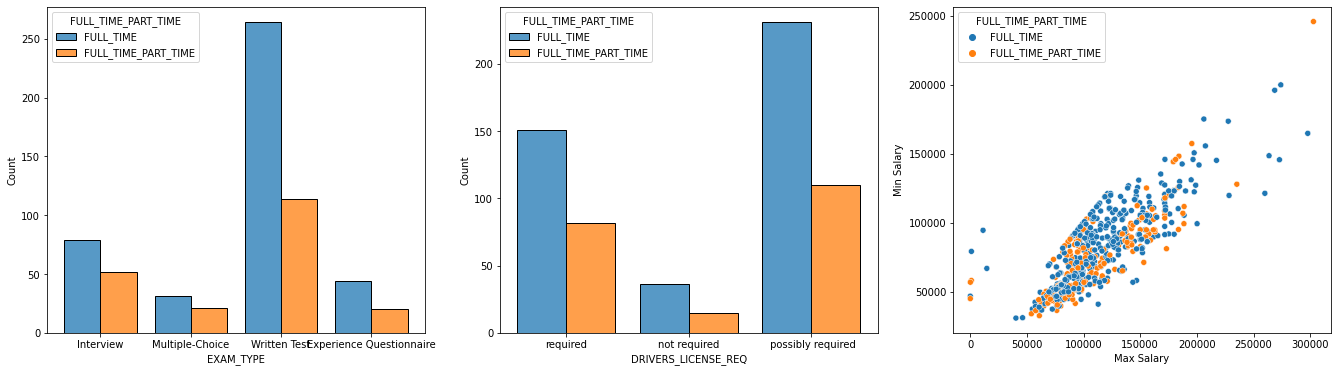

In [ ]:
# These plots to try find relation between ful_time column with other columns to fill the missing data
plt.figure(figsize=(23,6))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,3,1)
sns.histplot(x=df["EXAM_TYPE"] ,hue=df["FULL_TIME_PART_TIME"],multiple="dodge",shrink=.8)
plt.subplot(1,3,2)
sns.histplot(x=df['DRIVERS_LICENSE_REQ'] ,hue=df["FULL_TIME_PART_TIME"],multiple="dodge",shrink=.8)
plt.subplot(1,3,3)
sns.scatterplot(data=df, x="Max Salary", y="Min Salary" , hue="FULL_TIME_PART_TIME")
# I conclude that there is no clear relation between them

In [ ]:
# Because we dont have any jop with one experience required equal part time i will fill the nan data in ful_time_part_time column with ful time value
# also i wil fill the nan data with zero jop experience with none
df[[ "EXPERIENCE_LENGTH", "FULL_TIME_PART_TIME"]][df['FULL_TIME_PART_TIME'].isnull()==True][df['EXPERIENCE_LENGTH'].map(lambda d: len(d)) == 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME
17,[3],NaN
54,[3],NaN
65,[2],NaN
211,[2],NaN
233,[1],NaN
315,[3],NaN
500,[1],NaN
681,[1],NaN


In [ ]:
df['FULL_TIME_PART_TIME'][df['EXPERIENCE_LENGTH'].map(lambda d: len(d)) > 1].value_counts()
# after we see the ratio of values that required more than one experience i will fill the remaining 6 nan values with full_time value

FULL_TIME              120
FULL_TIME_PART_TIME     98
Name: FULL_TIME_PART_TIME, dtype: int64

In [ ]:
df['FULL_TIME_PART_TIME'].loc[df['FULL_TIME_PART_TIME'][df['FULL_TIME_PART_TIME'].isnull()==True][df['EXPERIENCE_LENGTH'].map(lambda d: len(d)) >= 1].index] ="FULL_TIME"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# filling the nan data of FULL_TIME_PART_TIME column
df['FULL_TIME_PART_TIME'].loc[df['FULL_TIME_PART_TIME'][df['FULL_TIME_PART_TIME'].isnull()==True][df['EXPERIENCE_LENGTH'].map(lambda d: len(d)) >= 1].index]  ="FULL_TIME"
df['FULL_TIME_PART_TIME'].loc[df['FULL_TIME_PART_TIME'][df['FULL_TIME_PART_TIME'].isnull()==True][df['EXPERIENCE_LENGTH'].map(lambda d: len(d)) == 0].index]  = "None"
# filling the nan data of Max & Min  salary columns (I just will use the mean value because the missing value just equal one)
df['Max Salary'].fillna(np.mean(df['Max Salary']), inplace=True)
df['Min Salary'].fillna(np.mean(df['Min Salary']), inplace=True)
# Creat New column represent the average salary
df["Average salary"] = (df['Max Salary']+df['Min Salary'])/2


In [ ]:
#To answer the questions we need to make new data columns in numerical form like (Exam_type , Experience length , course length , school type , driver licence , FULL_TIME_PART_TIME) to apply it in heatmap
New_data = df[["COURSE_COUNT","EDUCATION_YEARS","Average salary" ,"Day","month", "year"]].copy()
# I know that may one hot encoder act better than label encoder but that will increase the number of columns and will make it more difficult to compare between them
label_encoder = preprocessing.LabelEncoder()
for x in ['EXAM_TYPE',"SCHOOL_TYPE" ,"FULL_TIME_PART_TIME" , "DRIVERS_LICENSE_REQ"]:
  New_data[x]= label_encoder.fit_transform(df[x])

New_data["COURSE_LENGTH"]=0
for lis,num in zip(course_list, range(len(course_list))):
  code_list=[]
  for n in lis:
    if n == "0":
      continue
    try:
      code_list.append(float(n))
    except:
      pass
  if len(code_list)>=1:
    New_data["COURSE_LENGTH"].iloc[num]=min(code_list)/4

In [ ]:
# The Exp_condition column was added for this purpose because some of the requerment experience striked through by (or) condition
df[['EXPERIENCE_LENGTH',"Exp_Condition"]][df["EXPERIENCE_LENGTH"].map(lambda x : True if len(x)>1 else False)].replace("none","and")
New_data["EXPERIENCE_LENGTH"]=0
for row,num in zip(df["EXPERIENCE_LENGTH"],range(len(df["EXPERIENCE_LENGTH"]))):
  if len(row)>1:
    if df["Exp_Condition"].iloc[num]== "and":
      New_data["EXPERIENCE_LENGTH"].iloc[num]= sum(row)
    elif df["Exp_Condition"].iloc[num]== "or":
      New_data["EXPERIENCE_LENGTH"].iloc[num]= min(row)
  elif len(row)==1:
    New_data["EXPERIENCE_LENGTH"].iloc[num]= row[0]
  else:
    New_data["EXPERIENCE_LENGTH"].iloc[num]= 0
New_data

,COURSE_COUNT,EDUCATION_YEARS,Average salary,Day,month,year,EXAM_TYPE,SCHOOL_TYPE,FULL_TIME_PART_TIME,DRIVERS_LICENSE_REQ,COURSE_LENGTH,EXPERIENCE_LENGTH
0,0,0,111765.000000,5.0,10.0,2018.0,1,3,0,2,0.0,4.0
1,0,0,44108.500000,10.0,2.0,2017.0,1,3,2,1,0.0,0.0
2,0,0,91151.000000,21.0,9.0,2018.0,2,0,1,0,0.0,5.0
3,0,0,82102.000000,21.0,9.0,2018.0,3,3,0,0,0.0,2.0
4,0,0,122419.500000,7.0,4.0,2017.0,3,3,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
678,0,0,97697.793517,NaN,NaN,NaN,3,3,2,2,0.0,0.0
679,0,0,163009.500000,14.0,12.0,2018.0,3,3,0,2,0.0,3.0
680,0,0,190654.500000,2.0,3.0,2018.0,3,3,0,0,0.0,2.0
681,0,0,102371.500000,7.0,12.0,2018.0,1,3,0,0,0.0,1.0


In [ ]:
# code for cumulate and prepare EDUCATION_MAJOR column
for x in range(683):
  try:

      if df["EDUCATION_MAJOR"].iloc[x] in ("engineering," ,"engineering","engineering or surveying and one year of full-time paid experience as a member of a field survey party or field crew","engineering, physics, chemistry, mathematics, geology, or a closely related field","engineering, or upon obtaining a valid Engineer-in-Training Certificate recognized by the California State Board  for Professional Engineers, Land Surveyors, and Geologists"):
        df["EDUCATION_MAJOR"].iloc[x]= "Engineering Feild"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("accounting, finance, economics, or business administration","accounting","business, public administration, political science or related field","Economics, Business Administration, Accounting, or Finance"
                                             ,"Accounting","business or finance or related field","finance, accounting, economics, mathematics, or business administration and five years of full-time paid professional experience in a public accounting firm"
                                            ,"finance, economics or business administration","accounting, business administration, information systems, or a related field"):
        df["EDUCATION_MAJOR"].iloc[x]= "Finance"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("Art, Graphic Design or Computer Graphics","fine arts, performing arts, art history, architectural history, or art education","Arts (design, literary, media/communication, performing, and/or visual), Cultural Studies, Literature, English, Art History, Art Administration, or a closely related field","in visual arts such as Art, Art History, Museum Studies or a closely related field and two years of full-time paid professional art curatorial experience at a museum or nonprofit art gallery"):
        df["EDUCATION_MAJOR"].iloc[x]= "Art Feild"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("a life science or education (as designated by an Education Department of an accredited four-year college or university), or a teaching credential" ,"a natural science or education, and one year of full-time or two years of part-time paid or volunteer out of classroom (informal) or in classroom (formal) teaching experience","recreation, physical education, fine arts, kinesiology, gerontology, early childhood development, psychology, or sociology"):
        df["EDUCATION_MAJOR"].iloc[x]= "Education Field"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("plant or animal ecology, biology, watershed management, soil science, fisheries biology, wildlife biology, wildlife management, wildlife conservation, forest or rangeland management, rangeland resources, environmental resources, agricultural systems management, natural resources science, wildland soils, conservation biology, wetland ecology, range management, botany, zoology, ecology, stream ecology, restoration ecology, or natural resource management, and one year of full-time paid experience in any of the above fields"
                                              ,"zoology, biology, or a closely related field" , "environmental, ecological, biological, chemical, atmospheric, environmental health, or earth science, geography, ecological geography, geology, oceanography, environmental policy, sustainability, environmental planning, environmental engineering, urban planning and design, landscape architecture or a related field,"
                                             ,"biological, chemical, physical, environmental, or soil science","Microbiology or Bacteriology","a biological science","environmental science and/or occupational health and safety or a closely related field"):
        df["EDUCATION_MAJOR"].iloc[x]= "biological-chemical-physical-environmental Field"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("Park Administration, Recreation, Botany, Zoology, Biology, Fire Science, Criminal Justice, or other field-oriented Natural, Social or Behavioral Science, or a closely related field. \n3. The following experience may be substituted for the education lacking on a year-for-year basis:\n(a) Full-time experience, as a Park Ranger or other law enforcement officer with a recognized peace officer organization"
,"Business Administration, Public Administration, Computer or Information Sciences, Social Science, Psychology, or in a closely related field","emergency management, homeland security, public health, public administration, or a closely-related field" ):
        df["EDUCATION_MAJOR"].iloc[x]= "Administration Feild"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("civil, structural, or traffic engineering, architecture, environmental studies, planning, or transportation","Transportation Planning or Transportation Engineering","architecture, architectural engineering, environmental design, or building science" ,"urban planning, urban studies, urban design, architecture, landscape architecture, geography or a closely-related field and two years of full-time paid professional experience in long-range and/or current urban planning","landscape architecture"):
        df["EDUCATION_MAJOR"].iloc[x]= "urban Planning-Designing Feild"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("Television/Film Production, Journalism, Communications, Media Management or a closely related field","journalism, English, public relations, or communications and two years of full-time paid professional experience in supervising a public relations staff responsible for a comprehensive public information program"):
        df["EDUCATION_MAJOR"].iloc[x]= "journalism Feild"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("Library Science or Library and Information Science"):
        df["EDUCATION_MAJOR"].iloc[x]= "Library Science"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("Industrial Technology, Industrial Science, or any four-year degree","Industrial/Organizational Psychology or Psychometrics","Industrial Hygiene, Environmental & Occupational Health, Occupational Safety & Health, Environmental Health & Safety, or Safety Engineering","Industrial Hygiene, Chemistry, Physics, Health Science (Public or Occupational), Biological Science, or related field"):
        df["EDUCATION_MAJOR"].iloc[x]= "Industrial Science Feild"
      elif df["EDUCATION_MAJOR"].iloc[x] in ("Computer Science, Information Systems, or Geographical Information Systems","Geographic Information Systems, Engineering, Geography, Computer Science, or in a closely related field"):
        df["EDUCATION_MAJOR"].iloc[x]= "Computer Science Feild"
  except:
    continue


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# code for cumulate and prepare COURSE_SUBJECT column
for x in range(683):
  try:

      if df["COURSE_SUBJECT"].iloc[x] in ("Geometry and Trigonometry" ,"geometry and trigonometry","trigonometry"):
        df["COURSE_SUBJECT"].iloc[x]= "Geometry and Trigonometry"
      elif df["COURSE_SUBJECT"].iloc[x] in ("or Delmar Electrical Training Program sponsored by LADWP" ,"or Delmar Electricity"):
        df["COURSE_SUBJECT"].iloc[x]= "Delmar Electrical Training Program"
      elif df["COURSE_SUBJECT"].iloc[x] in ("engineering or inspecting technology" ):
        df["COURSE_SUBJECT"].iloc[x]= "engineering"
      elif df["COURSE_SUBJECT"].iloc[x] in ("operating an offset process duplicating machine or direct process duplicating machine" ):
        df["COURSE_SUBJECT"].iloc[x]= "operating an (offset | direct) process duplicating machine "

  except:
    continue

### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

A non-experienced job seeker wants to know what is the best job for him?

In [ ]:
# the first stip is to know the count of jobs that not need experience ,I find that there is 65 job that not required any  experience
df[["EXPERIENCE_LENGTH"]][df['EXPERIENCE_LENGTH'].map(lambda d: len(d)) == 0].count()

EXPERIENCE_LENGTH    65
dtype: int64

In [ ]:
# After that to reduce the job range I use school type feature to eleminate the jobs that required any type of school we reduce the number from 65 to 24
df[["EXPERIENCE_LENGTH"]][df['EXPERIENCE_LENGTH'].map(lambda d: len(d)) == 0][df["SCHOOL_TYPE"].isnull()==True].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


EXPERIENCE_LENGTH    0
dtype: int64

In [ ]:
# in this step I added two features (average salary and driver license) to reduce the number of values to 4
# The first job it will be Eliminated because it required Nurse license
df[["FILE_NAME","JOB_CLASS_TITLE","JOB_CLASS_NO","EXPERIENCE_LENGTH","DRIVERS_LICENSE_REQ", "Average salary"]][df['EXPERIENCE_LENGTH'].map(lambda d: len(d)) == 0][df["SCHOOL_TYPE"].isnull()==True][df["DRIVERS_LICENSE_REQ"]=="not required"].sort_values("Average salary" , ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,FILE_NAME,JOB_CLASS_TITLE,JOB_CLASS_NO,EXPERIENCE_LENGTH,DRIVERS_LICENSE_REQ,Average salary


In [ ]:
"""
As a final result acording to the data shown before we can say that the job with name ( OFFICE SERVICES ASSISTANT ) it represent the best choice for
non-experienced job seeker acording to many feature as I represnt before

"""

'\nAs a final result acording to the data shown before we can say that the job with name ( OFFICE SERVICES ASSISTANT ) it represent the best choice for\nnon-experienced job seeker acording to many feature as I represnt before\n\n'

### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

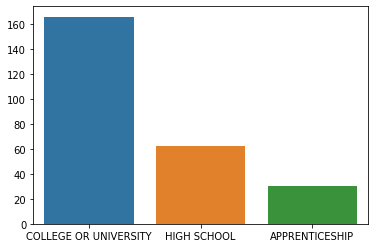

In [ ]:
sns.barplot( y=df["SCHOOL_TYPE"].value_counts()[1:].values,x=df["SCHOOL_TYPE"].value_counts()[1:].index)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1800 with 0 Axes>

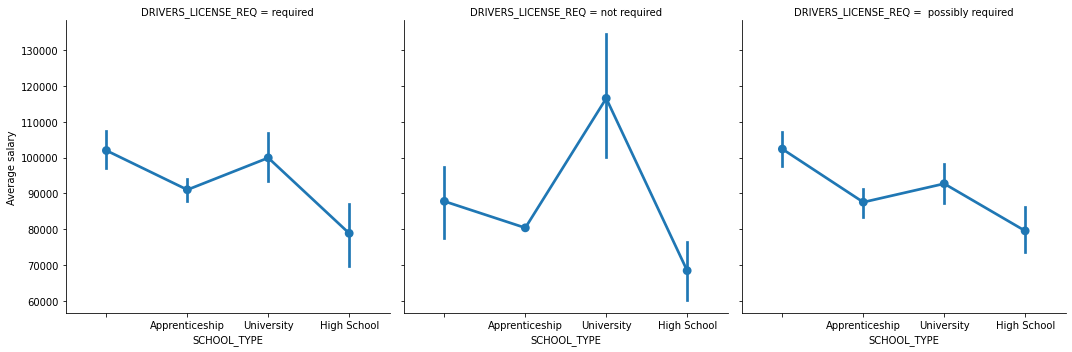

In [ ]:
plt.figure(figsize=(15,25))
f=sns.factorplot('SCHOOL_TYPE','Average salary',col='DRIVERS_LICENSE_REQ',data=df)
f.set_xticklabels([' ','Apprenticeship','University', 'High School'])

In [ ]:
"""
Answer :
ASs we see before that university school type has the most opportunites between the other school type also acording to salary
we see that University school type has the highest Average salary comparing to athore type howe ever he has a driver licencse or not the
(College or University) school type is the best choice
"""

'\nAnswer :\nASs we see before that university school type has the most opportunites between the other school type also acording to salary \nwe see that University school type has the highest Average salary comparing to athore type howe ever he has a driver licencse or not the \n(College or University) school type is the best choice \n'

### <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?

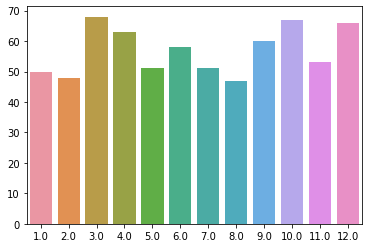

In [ ]:
sns.barplot( y=df["month"].value_counts().values , x=df["month"].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


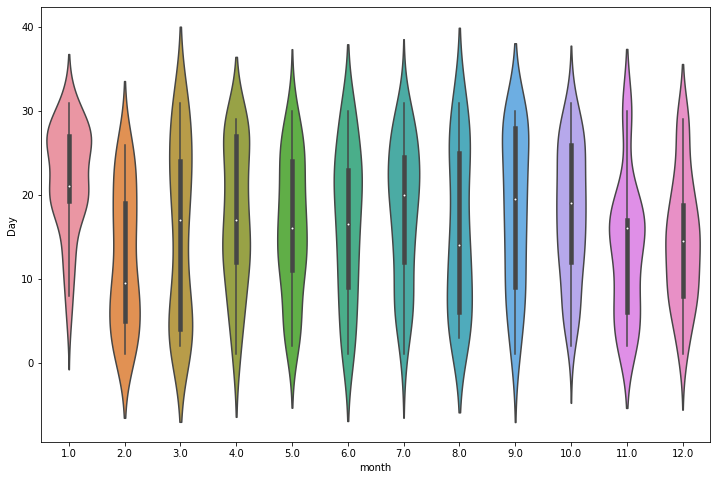

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot("month","Day",data=df,split=True)
# I try to see if there concentration in one third on the higest mont that we seen before but the distribution is near to be equal along the month

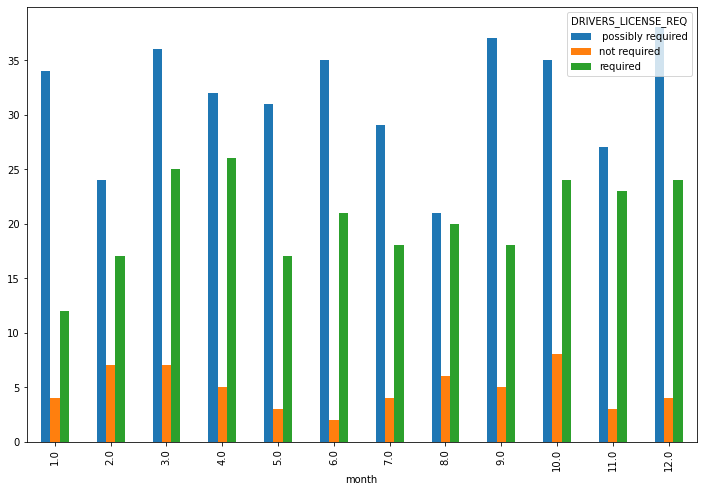

In [ ]:
df.groupby(["month","DRIVERS_LICENSE_REQ"]).count()["JOB_CLASS_TITLE"].unstack().plot(kind="bar", figsize=(12,8))

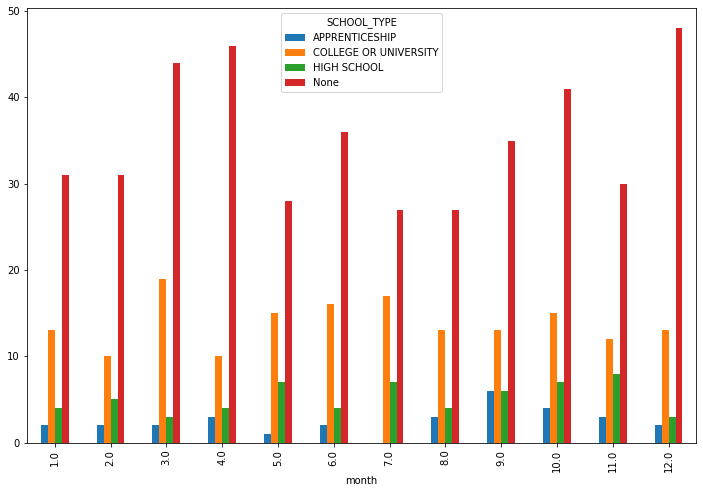

In [ ]:
df.groupby(["month","SCHOOL_TYPE"]).count()["JOB_CLASS_TITLE"].unstack().plot(kind="bar", figsize=(12,8))

In [ ]:
"""
Answer:
As we see before that if we just need to make general answer we see that in first graph there are nearly 3 month that
have the highest Employment opportunities these months are (3,10,12) and acording to thes second graph we see that there is no
diffrent concentration in one third of month against the remaning of the same month so I neglegt the effect of days to my answer
but if we need to take an answer acording to some condition like
1- not having driving license: I see that month (10) have the best Employment opportunities
2-type of school is college: I see that month (3) have the best Employment opportunities
3- type of college is none: I see that month (3,4,12) have the best Employment opportunities
and as we see that there is no general answer to give it depend on the employee qualification and what he need
"""

'\nAnswer:\nAs we see before that if we just need to make general answer we see that in first graph there are nearly 3 month that\nhave the highest Employment opportunities these months are (3,10,12) and acording to thes second graph we see that there is no \ndiffrent concentration in one third of month against the remaning of the same month so I neglegt the effect of days to my answer\nbut if we need to take an answer acording to some condition like\n1- not having driving license: I see that month (10) have the best Employment opportunities\n2-type of school is college: I see that month (3) have the best Employment opportunities\n3- type of college is none: I see that month (3,4,12) have the best Employment opportunities\nand as we see that there is no general answer to give it depend on the employee qualification and what he need\n'

### <span style="color:brown">Q4:

Is experience more important than educational level?

In [ ]:
sub_data= pd.DataFrame()
sub_data['EXPERIENCE_LENGTH']= New_data['EXPERIENCE_LENGTH'].copy().map(lambda x : "NO_EXP" if x==0 else "With_EXP")
sub_data['SCHOOL_TYPE']= df['SCHOOL_TYPE'].copy().map(lambda x : "NO_EDU" if x=="None" else "With_EDU")
sub_data['Max Salary'] = df['Max Salary'].copy()

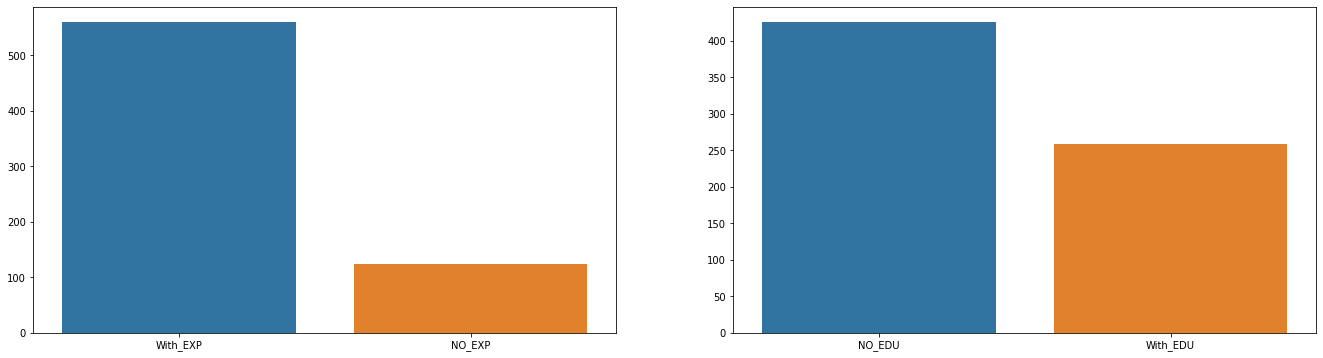

In [ ]:
#These graphs represent the opporotunites of jop acoording to experience and Education level
plt.figure(figsize=(23,6))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
sns.barplot( y=sub_data["EXPERIENCE_LENGTH"].value_counts().values,x=sub_data["EXPERIENCE_LENGTH"].value_counts().index)
plt.subplot(1,2,2)
sns.barplot( y=sub_data["SCHOOL_TYPE"].value_counts().values,x=sub_data["SCHOOL_TYPE"].value_counts().index)

In [ ]:
a=sub_data[['EXPERIENCE_LENGTH','Max Salary']][sub_data['SCHOOL_TYPE']=="NO_EDU"].groupby(sub_data["EXPERIENCE_LENGTH"]).mean()
a

,Max Salary
EXPERIENCE_LENGTH,
NO_EXP,97228.962713
With_EXP,120662.513228


In [ ]:
b=sub_data[['SCHOOL_TYPE','Max Salary']][sub_data['EXPERIENCE_LENGTH']=="NO_EXP"].groupby(sub_data["SCHOOL_TYPE"]).mean()
b

,Max Salary
SCHOOL_TYPE,
NO_EDU,97228.962713
With_EDU,107681.272727


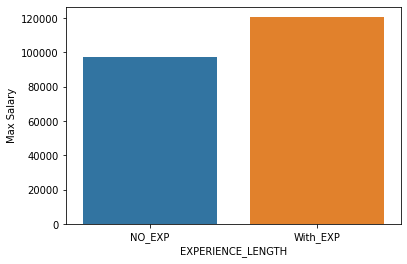

In [ ]:
sns.barplot(x=a.index,y=a["Max Salary"])

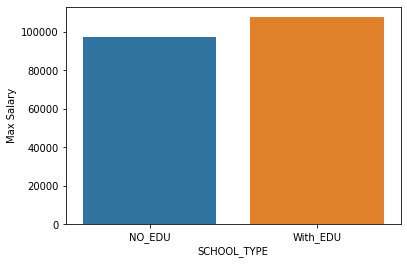

In [ ]:
sns.barplot(x=b.index,y=b["Max Salary"])

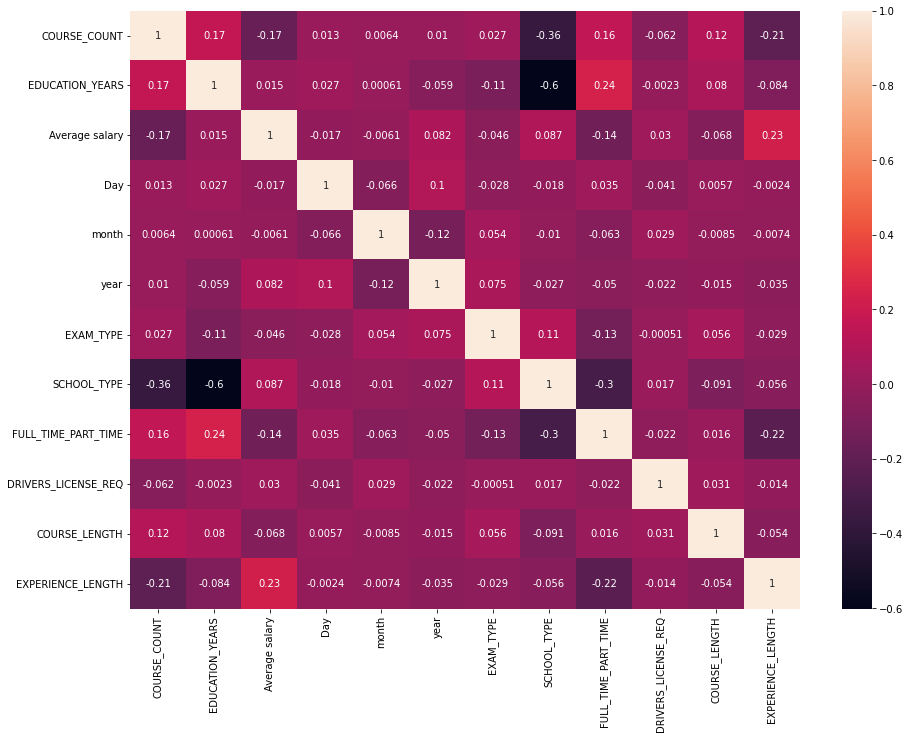

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(New_data.corr(), annot=True)

In [ ]:
"""
Answer:
From the first graph we see that the opportunites for getting job is increace if we got Experience or Education but if we compare between them
we will conclude that experience give the person more opporutunites than getting education
Also as we see in the next codes and graph if we compare the effect of two feature on salary we see that experience give us more effect on salary than
education and to be sertain , I draw heatmap to see the corr between them and salary we see that experience affect more on salary than education

"""

'\nAnswer:\nFrom the first graph we see that the opportunites for getting job is increace if we got Experience or Education but if we compare between them \nwe will conclude that experience give the person more opporutunites than getting education\nAlso as we see in the next codes and graph if we compare the effect of two feature on salary we see that experience give us more effect on salary than \neducation and to be sertain , I draw heatmap to see the corr between them and salary we see that experience affect more on salary than education\n\n'

### <span style="color:brown">Q5:

Which fresh grade job that will guarantee many job offers in the future for him?

In [ ]:
for x in range(683):
  try:
    for z in range(len(df["EXP_JOB_CLASS_TITLE"].iloc[x])):
      if df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("the construction" ,"construction","building","general residential construction"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "residential construction laborer"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("principal clerk" ,"senior administrative clerk" ,"accounting clerk","class at the level of senior administrative clerk"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "clerk"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("carpenter" ,"licensed contractor in the carpentry","carpentry","carpet layer"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "carpenter"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("environmental supervisor" ,"environmental specialist"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "environmental specialist"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("electrical" ,"electric trouble dispatcher","electrical craft helper","electrical inspector"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "electrical"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("city planning associate","senior city planner" ,"planning","urban planning","long-range and/or current urban planning","class at that level providing professional city planning"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "city planner"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("water utility worker" ,"water utility supervisor","journey-level plumber","plumbing inspector"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "water utility worker"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("maintenance laborer" ,"the maintenance" ,"maintenance"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "maintenance laborer"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("principal storekeeper" ,"senior storekeeper" ):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "storekeeper"
      elif df["EXP_JOB_CLASS_TITLE"].iloc[x][z] in ("engineering" ,"structural engineer" ,"class at the level of civil engineer","architect","position at the level of mechanical engineering associate ii","senior building operating engineer"):
        df["EXP_JOB_CLASS_TITLE"].iloc[x][z]= "Engineer"
  except:
    continue

title_list=[]
for lis in df["EXP_JOB_CLASS_TITLE"]:
  for item  in lis:
    title_list.append(item)
EXP_S = pd.Series(title_list)
EXP_S.value_counts()[0:15]


not                                 36
city planner                        16
electrical                          12
residential construction laborer    12
Engineer                            12
carpenter                            9
clerk                                9
water utility worker                 8
maintenance laborer                  8
installation                         6
storekeeper                          6
office clerical experience           5
environmental specialist             5
inspection                           4
building mechanical inspector        4
dtype: int64

In [ ]:
"""
Answer :
I know that the feature need more cleaning but I tried to take the most frequent job and group them as in the last code
The final result as wee see that city planner take the highest freqent with 16 value and after that we have three jobs that
has the same values , they are (electrical , residential construction laborer , Engineer )
"""

### <span style="color:brown">Q6:

"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER
"

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments you structred above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
lem=WordNetLemmatizer()
req=' '.join(text for text in df['REQUIREMENT_SET_TEXT'])
text=[lem.lemmatize(w) for w in word_tokenize(req)]
vect=TfidfVectorizer(ngram_range=(1,3),max_features=100)
vectorized_data=vect.fit_transform(text)
vect.vocabulary_.keys()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


dict_keys(['four', 'year', 'of', 'full', 'time', 'full time', 'paid', 'experience', 'level', 'and', 'valid', 'certificate', 'by', 'the', 'city', 'los', 'angeles', 'department', 'building', 'an', 'with', 'in', 'position', 'that', 'work', 'from', 'which', 'to', 'must', 'be', 'at', 'completion', 'recognized', 'or', 'program', 'accredited', 'may', 'substituted', 'for', 'two', 'performing', 'mechanical', 'repair', 'one', 'required', 'professional', 'engineering', 'ii', 'system', 'design', 'construction', 'maintenance', 'related', 'equipment', 'engineer', 'california', 'board', 'engaged', 'fire', 'water', 'class', 'electrical', 'and or', 'provides', 'commercial', 'state', 'senior', 'planning', 'administration', 'field', 'degree', 'four year', 'college', 'university', 'including', 'semester', 'unit', 'quarter', 'public', 'management', 'supervisor', 'on', 'science', 'information', 'school', 'service', 'least', 'month', 'graduation', 'three', 'accounting', 'analysis', 'requirement', 'training',

In [ ]:
co =0
ind=[]
for x in range(683):
  for z in ["women's",'women'," she's ",' her ','female','girl','woman']:
    if z in df['REQUIREMENT_SET_TEXT'].iloc[x].lower():
      ind.append(x)
      co+=1
co

0

In [ ]:
"""
Answer:
Acording to the first code that give us all the frequents words in files we see that there are no word that can do bias for any gender and to be certain
from that i tried to see if one of the popular word that describe female found in any file , the result that i have they are not found
so we can say that there isn't bais for men over women
"""

### <span style="color:brown">Q7:

The city need an advice based on your analysis, build a new schools for more fresh non-experienced workers or encorge the work environment to help the workers to get promotions?

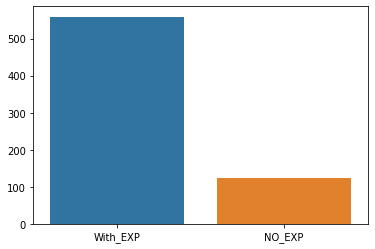

In [ ]:
sns.barplot( y=sub_data["EXPERIENCE_LENGTH"].value_counts().values,x=sub_data["EXPERIENCE_LENGTH"].value_counts().index)

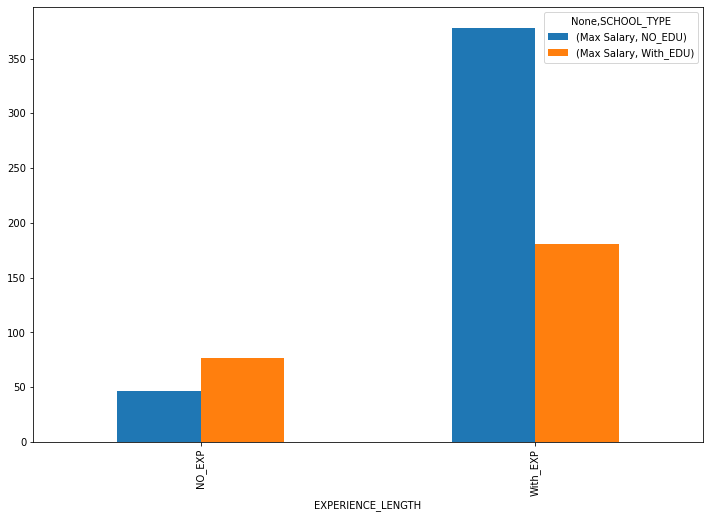

In [ ]:
sub_data.groupby(["EXPERIENCE_LENGTH","SCHOOL_TYPE"]).count().unstack().plot(kind="bar", figsize=(12,8))

In [ ]:
pd.crosstab(sub_data.EXPERIENCE_LENGTH,sub_data.SCHOOL_TYPE,margins=True).style.background_gradient(cmap='summer_r')

SCHOOL_TYPE,NO_EDU,With_EDU,All
EXPERIENCE_LENGTH,,,
NO_EXP,47,77,124
With_EXP,378,181,559
All,425,258,683


In [ ]:
"""
Answer:
as we see from the first graph if we deal with sample of 700 job there about 124 job that can acept the non experience pepole that equal 17% from total job
but not all the 17% job can acept non experience job with out education level
The job with non experience requerment can be acepted without education level =>  44 fro 124 that equal 35% from non exeperienced pepole or
                                                                                  44 from 680 thats equal 0.065% from total job
The job with non experience requerment can be acepted with education level => 77 from 124 equal about 65% from non exeperienced pepole or
                                                                              77 from 680 equal about 0.11% from total job
acording to that if the city has school that can cover this ratio we dont need to build new school but we need to encourge thee employee to take more
cources and education level because that will help them but if the school not cover that persent from the real number of job we need to buil new school
"""

### <span style="color:brown">Q8:

What is the average salary for worker with a driver licence?

In [ ]:
df["DRIVERS_LICENSE_REQ"].value_counts()
# there some files conclude that the license may be required so I will give two answers one that cocnlude possibly required values and the other answer not conclude it

 possibly required    379
required              243
not required           61
Name: DRIVERS_LICENSE_REQ, dtype: int64

In [ ]:
#including  possibly required values
df["Average salary"][df["DRIVERS_LICENSE_REQ"] != "not required"].mean()

97921.41668571848

In [ ]:
# with not including  possibly required values
df["Average salary"][df["DRIVERS_LICENSE_REQ"] == "required"].mean()

99416.76410912299

## <span style="color:brown">Q9:

list the most feature that effect the salary of the worker.

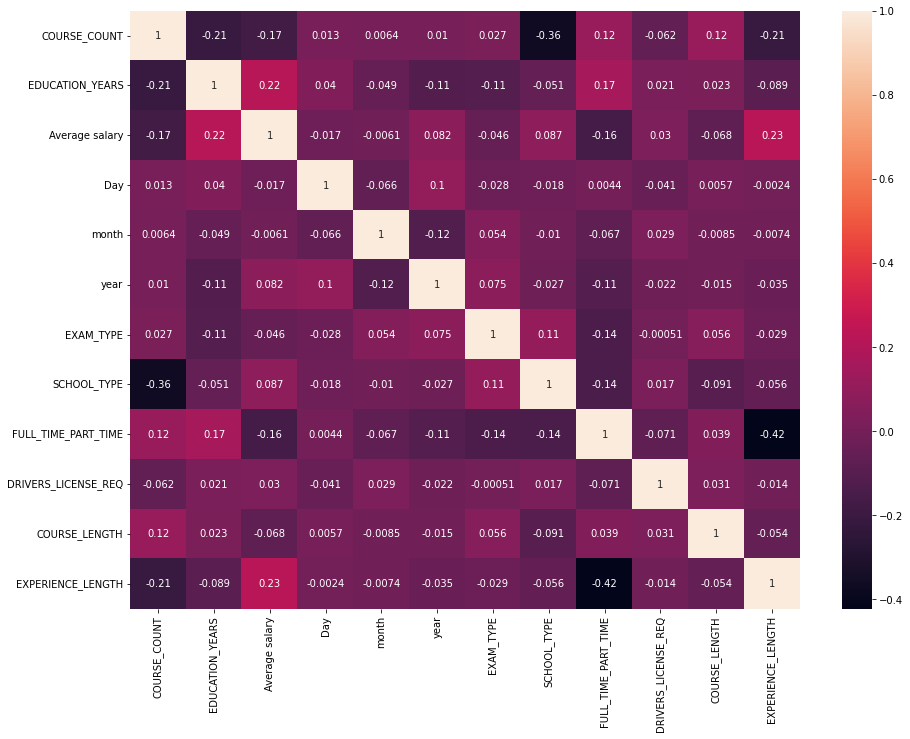

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(New_data.corr(), annot=True)


In [ ]:
"""
Answer:
As we show in heat map the best corr with Average salary column is as follow from the highest to the lowest
1- EXPERIENCE_LENGTH     with   corr = 0.23
2- EDUCATION_YEARS       with   corr = 0.22
3- COURSE_COUNT          with   corr = 0.17
"""

## <span style="color:brown">Q10:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

- Min & Max salary features Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


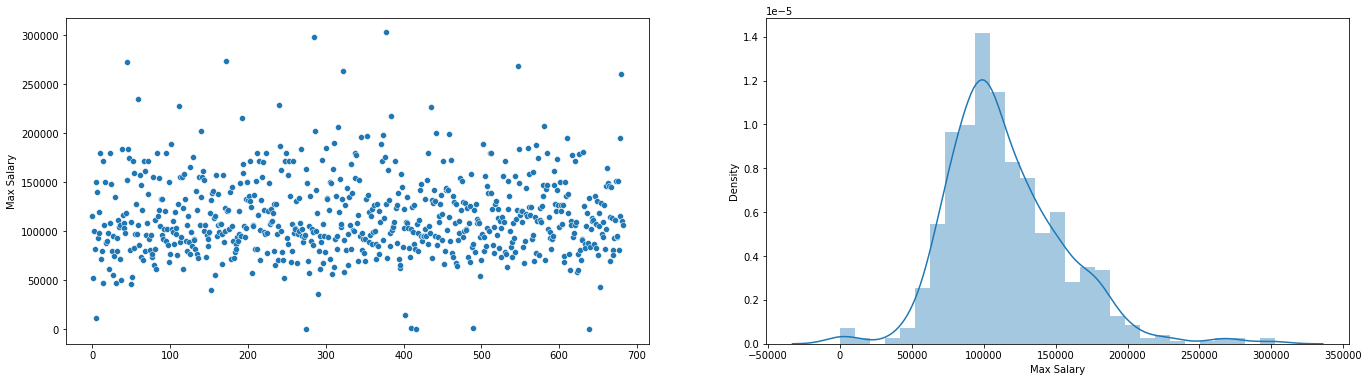

In [ ]:
# Analysing (Average salary) feature => the
plt.figure(figsize=(23,6))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
sns.scatterplot(x=df['Max Salary'].index,y=df['Max Salary'])
plt.subplot(1,2,2)
sns.distplot(df['Max Salary'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


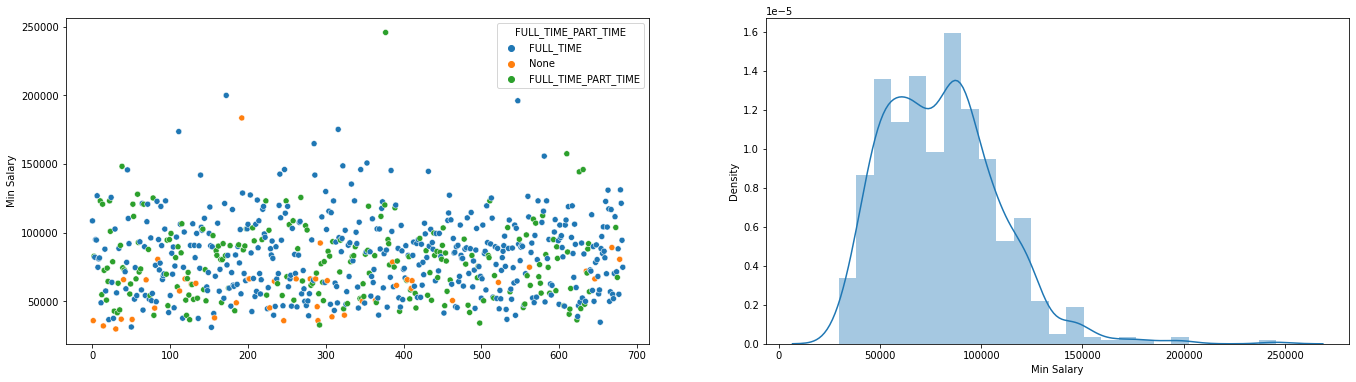

In [ ]:
plt.figure(figsize=(23,6))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
sns.scatterplot(x=df['Min Salary'].index,y=df['Min Salary'], hue =df['FULL_TIME_PART_TIME'])
plt.subplot(1,2,2)
sns.distplot(df['Min Salary'])

- COURSE_LENGTH feature Analysis

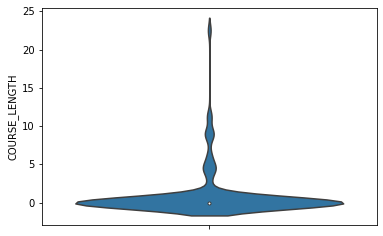

In [ ]:
sns.violinplot(y=New_data["COURSE_LENGTH"])

- (EXPERIENCE_LENGTH - COURSE_COUNT - EDUCATION_YEARS) features Analysis

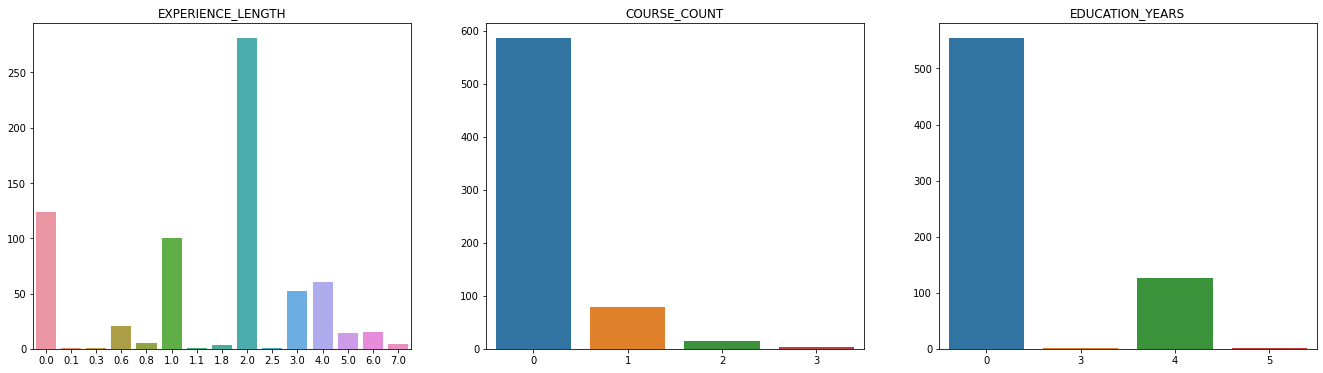

In [ ]:
plt.figure(figsize=(23,6))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,3,1)
plt.title("EXPERIENCE_LENGTH")
sns.barplot(x=New_data['EXPERIENCE_LENGTH'].value_counts().index,y=New_data['EXPERIENCE_LENGTH'].value_counts().values)
plt.subplot(1,3,2)
plt.title("COURSE_COUNT")
sns.barplot(x=New_data['COURSE_COUNT'].value_counts().index,y=New_data['COURSE_COUNT'].value_counts().values)
plt.subplot(1,3,3)
plt.title("EDUCATION_YEARS")
sns.barplot(x=New_data['EDUCATION_YEARS'].value_counts().index,y=New_data['EDUCATION_YEARS'].value_counts().values)

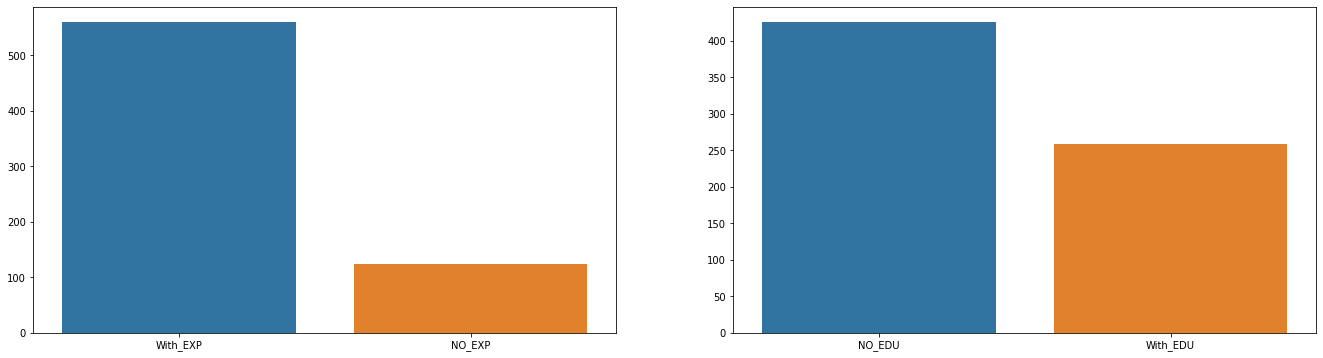

In [ ]:
#These graphs represent the opporotunites of jop acoording to experience and Education level
plt.figure(figsize=(23,6))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
plt.title("EDUCATION_YEARS")
sns.barplot( y=sub_data["EXPERIENCE_LENGTH"].value_counts().values,x=sub_data["EXPERIENCE_LENGTH"].value_counts().index)
plt.subplot(1,2,2)
plt.title("EDUCATION_YEARS")
sns.barplot( y=sub_data["SCHOOL_TYPE"].value_counts().values,x=sub_data["SCHOOL_TYPE"].value_counts().index)

In [ ]:
pd.crosstab(New_data.EXPERIENCE_LENGTH,df.SCHOOL_TYPE).style.background_gradient(cmap='summer_r')

SCHOOL_TYPE,APPRENTICESHIP,COLLEGE OR UNIVERSITY,HIGH SCHOOL,None
EXPERIENCE_LENGTH,,,,
0.0,1,60,16,47
0.1,0,0,0,1
0.3,0,0,0,1
0.6,1,3,5,12
0.8,0,0,4,1
1.0,4,28,16,52
1.1,0,0,0,1
1.8,0,0,0,3
2.0,0,42,14,225


In [ ]:
pd.crosstab(New_data.EXPERIENCE_LENGTH,df.COURSE_COUNT).style.background_gradient(cmap='summer_r')

COURSE_COUNT,0,1,2,3
EXPERIENCE_LENGTH,,,,
0.0,77,36,8,3
0.1,1,0,0,0
0.3,1,0,0,0
0.6,19,2,0,0
0.8,1,4,0,0
1.0,86,10,3,1
1.1,1,0,0,0
1.8,3,0,0,0
2.0,265,13,3,0


- Open_Date feature Analysis

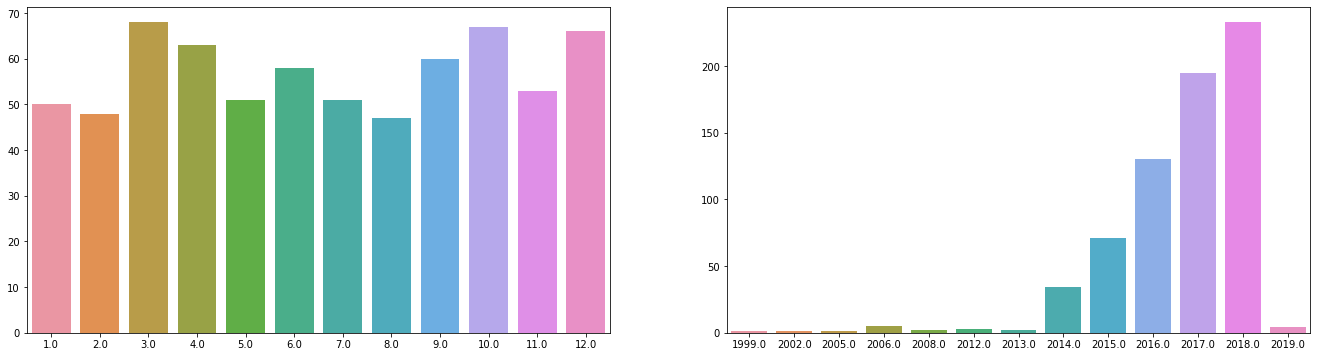

In [ ]:
plt.figure(figsize=(23,6))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
sns.barplot( y=df["month"].value_counts().values , x=df["month"].value_counts().index)
plt.subplot(1,2,2)
sns.barplot( y=df["year"].value_counts().values , x=df["year"].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


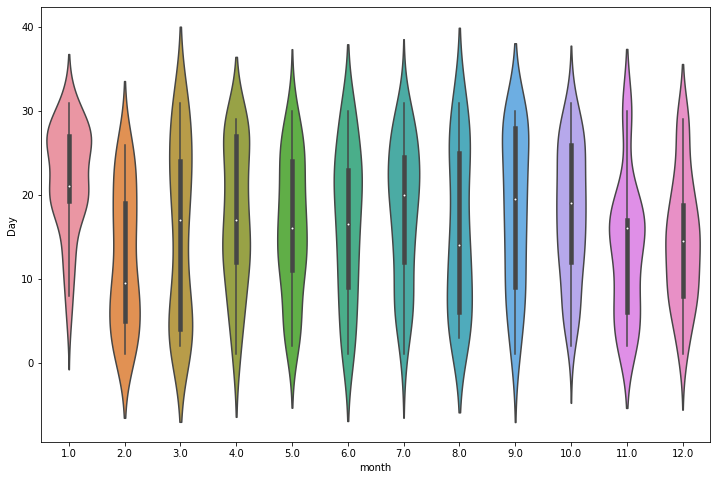

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot("month","Day",data=df,split=True)

## <font color='red'>Observations for all Numerical features:</font>
---

**Max Salary:** The values are nearly to be normal distibution around 100k , its affected by Experience more than Education level.

**Min Salary:** The values are concentrate between 50k to 100k , and we see that the jobs with higer salary require full time work.

**EXPERIENCE_LENGTH:** acoording to the plots it seems that jobs in most situation require one or two yeas of experience, also we see that the job that acept non experienced employee the employee at most have university level ,however the APPRENTICESHIP employee have experience year than other educational level.

**COURSE_LENGTH:** There are Low demand on cources and that is the result to see the cource length is al most zero.The values are concentrate between 1 year to ten year .

**Education Years:** There are many job that doesnt make the education one of its requierment , howeever as we see that the number four  is the most freqent number of year and thats the most feilds in university need four years. in addition to that the salary of your job will increase with increasing education years.

**Course Count:** The most jobs not require cources to apply for it, however we see that the jobs that not require any bast experience to to make up for it it make the cources as alternative for the experience feild.

**Open Date:** As we see that the distribution of jobs on years not equal ,how mush the jobs opporotunities increase with increasing year,espicaly in the months(3,10,12) , the concentration of opporotunities near to be not biased except in first month , the jop concentrated on the third part of that month.

## <span style="color:brown">Q11:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


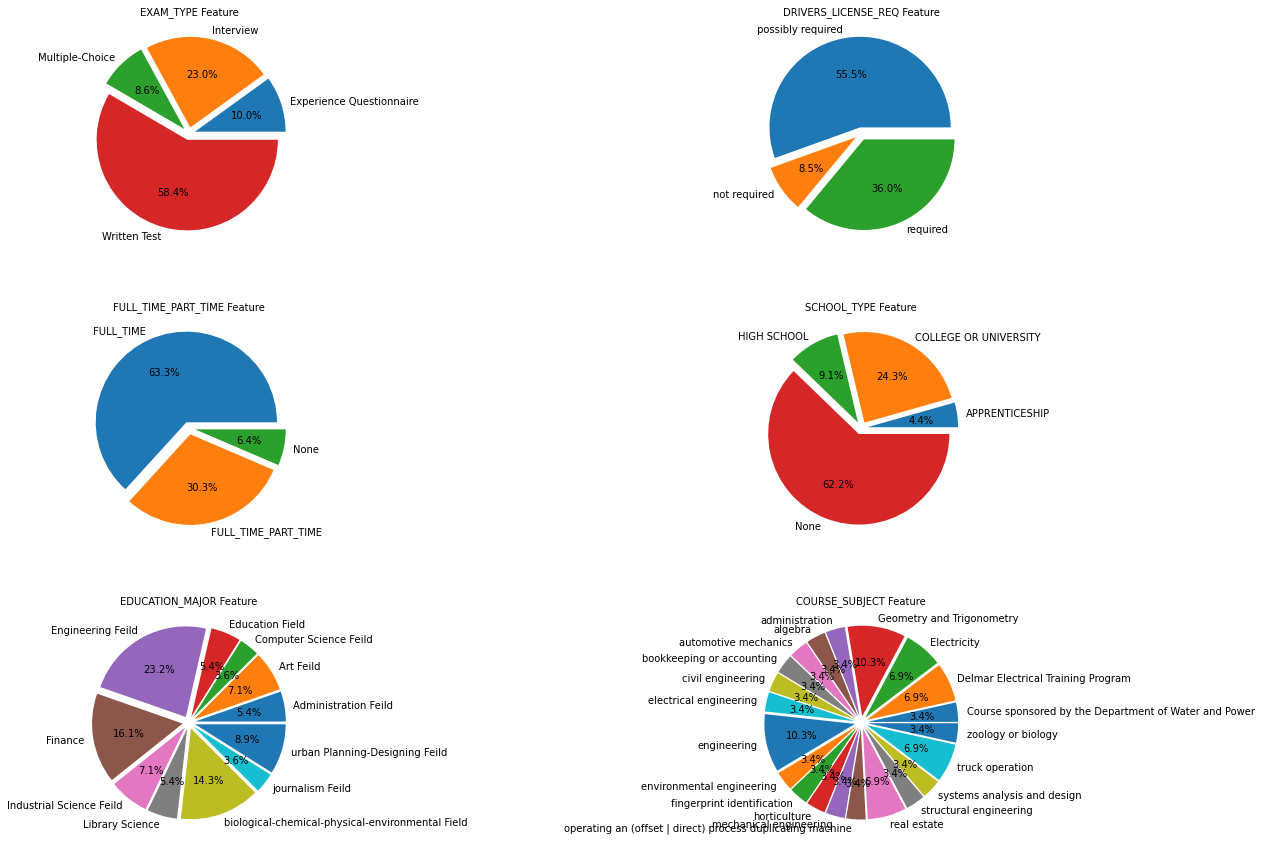

In [ ]:
cat_features=['EXAM_TYPE','DRIVERS_LICENSE_REQ','FULL_TIME_PART_TIME','SCHOOL_TYPE','EDUCATION_MAJOR',"COURSE_SUBJECT"]
plt.figure(figsize=(23,15))
plt.subplots_adjust(hspace=0.3,wspace=0.1)
for x,num  in zip(cat_features,range(1,7)):
  plt.subplot(3,2,num)
  data = df.groupby(x)[x].count()
  val_num= len(df[x].value_counts().index)
  data.plot.pie(autopct="%.1f%%",explode= [0.07]*val_num, ylabel='',label='')
  plt.title(f"{x} Feature", fontsize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


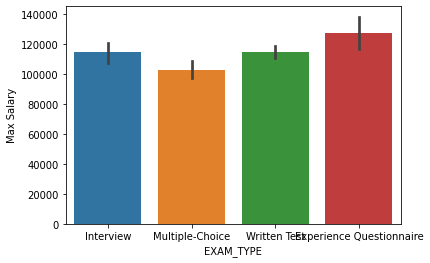

In [ ]:
sns.barplot('EXAM_TYPE','Max Salary',data=df)

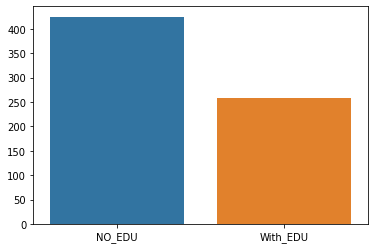

In [ ]:
sns.barplot( y=sub_data["SCHOOL_TYPE"].value_counts().values,x=sub_data["SCHOOL_TYPE"].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


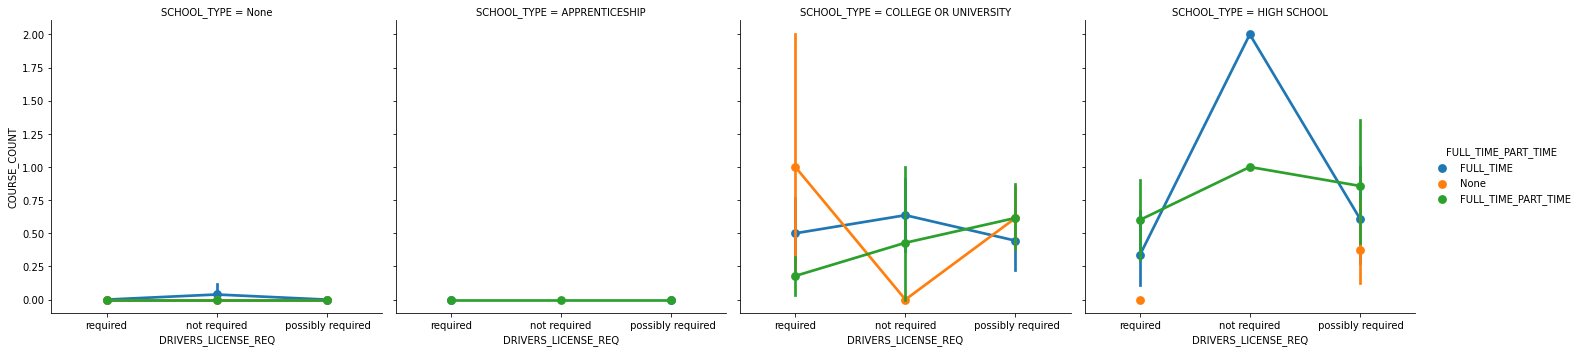

In [ ]:
['EXAM_TYPE','DRIVERS_LICENSE_REQ','FULL_TIME_PART_TIME','SCHOOL_TYPE','EDUCATION_MAJOR']
sns.factorplot('DRIVERS_LICENSE_REQ','COURSE_COUNT',hue='FULL_TIME_PART_TIME',col='SCHOOL_TYPE',data=df)

In [ ]:
pd.crosstab([df.EDUCATION_MAJOR,df.DRIVERS_LICENSE_REQ],[df.EXAM_TYPE],margins=True).style.background_gradient(cmap='summer_r')

## <font color='red'>Observations for all Categorical features:</font>
---

**Exam Type:** the most exam type is written test but with increasing the salary the tests will convert to Questionnaire and interviews,also we see that the engineering field in education major exams will almost be interviews.

**DRIVERS_LICENSE_REQ:** Acording educational major we see that driver licence at most will be required or possibly required for employye with educational level, also the driver lisense will not be required for high school educational level with full time job .

**FULL_TIME_PART_TIME:** The most job require full time employee . However wth high school education level with required driver licence the most ratio differ between full time and part time.

**SCHOOL_TYPE:** however that the most job dont require an educational level but if it found that will reflect positivly to the salary, for APPRENTICESHIP employee it required to have experience year more than the other educational type.

**EDUCATION_MAJOR:** The jobs with education major almost their test type will be interviews, also we see that the driver licence is almost required with educational major.
